In [21]:
from sympy import *
import sympy as sp
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Ecuación logística

#### Se definen las variables

In [7]:
t = sp.symbols('t')
p = sp.Function('p')
a = sp.symbols('a')
b = sp.symbols('b')
p0 = sp.symbols('p0')

#### Se define la ecuación

In [9]:
ode = sp.Eq( sp.Derivative(p(t), t) -a*p(t) +b*p(t)*p(t), 0 )
ode

Eq(-a*p(t) + b*p(t)**2 + Derivative(p(t), t), 0)

#### Se resuelve la ecuación

In [10]:
sol = sp.dsolve( ode, p(t), ics={p(0):p0} )
sol

Eq(p(t), a*exp(a*(t + log(b*p0/(-a + b*p0))/a))/(b*(exp(a*(t + log(b*p0/(-a + b*p0))/a)) - 1)))

#### Se dan valores a \$a,\ b\ \text{y}\ p_0$ y se evaluan las respectivas soluciones

In [12]:
constants = {a:0.03, b:0.0001, p0:5}
sol1 = sol.subs(constants)
sol1

Eq(p(t), -5.08474576271187*exp(0.03*t)/(-0.0169491525423729*exp(0.03*t) - 1))

In [13]:
constants = {a:0.03, b:0.0001, p0:6}
sol2 = sol.subs(constants)
sol2

Eq(p(t), -6.12244897959184*exp(0.03*t)/(-0.0204081632653061*exp(0.03*t) - 1))

In [14]:
constants = {a:0.03, b:0.0001, p0:7}
sol3 = sol.subs(constants)
sol3

Eq(p(t), -7.16723549488055*exp(0.03*t)/(-0.0238907849829352*exp(0.03*t) - 1))

#### Se grafican las soluciones

In [17]:
#La función lambdify permite definir una función a partir de la expresión simbólica
func1 = sp.lambdify(t, sol1.rhs, 'numpy')
func2 = sp.lambdify(t, sol2.rhs, 'numpy')
func3 = sp.lambdify(t, sol3.rhs, 'numpy')

In [22]:
#Partición
tt = np.arange(0, 200, 1)
#Evaluar las funciones
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)

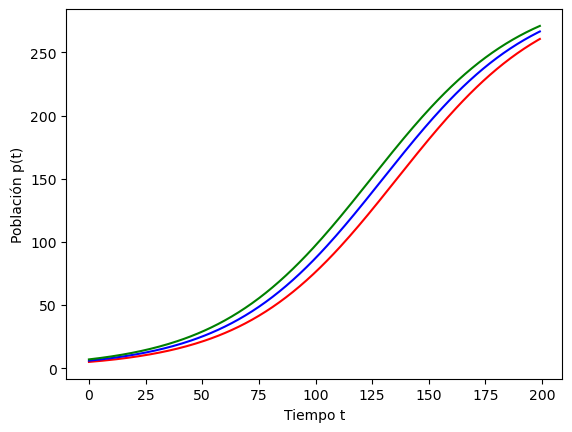

In [25]:
#Graficar
plt.plot(tt, pp1, 'r', tt, pp2, 'b', tt, pp3, 'g')
plt.xlabel('Tiempo t')
plt.ylabel('Población p(t)')
plt.show()

#### Se clasifica y se verifica la solución

In [26]:
classify_ode(ode)

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

In [28]:
sol = dsolve(ode, p(t))
sol

Eq(p(t), a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1)))

In [29]:
checkodesol(ode, sol)

(True, 0)

#### Se muestra que el denominador por sí solo no es solución

In [30]:
C1 = sp.symbols('C1')
sol1 = b*( exp( a*(C1+t) ) -1 )
sol1

b*(exp(a*(C1 + t)) - 1)

In [31]:
checkodesol(ode, sol1)

(False, b*(a + b**2*(1 - exp(a*(C1 + t)))**2))

---

# 2. Ecuación de Lagrange

#### Se definen las variables

In [ ]:
x = sp.symbols()